# Assignment08
# ID: 20155093
# Name: Sonjeongseol
# Github Link: https://github.com/wjdtjf1234/assignment01.git¶

# Importing APIs

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

In [11]:
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    return(s)

# We will going to use mnist data sets

In [12]:
h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Declare some arrays to store labels and image data of training and test data sets

In [13]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# We can get model parameters through getting average values of image vectors of label 0.

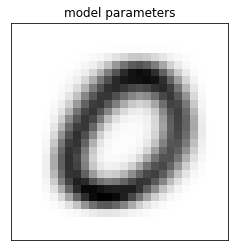

In [14]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:]) 
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    #image sets

    count += 1

count = 0

for line in data_test:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    
    count += 1
    
im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):
    im_average[:, list_label_train[i]]+=list_image_train[:, i]
    im_count[list_label_train[i]] += 1

im_average[:, 0] /= im_count[0]
plt.subplot(1,1,1)
plt.title("model parameters")
plt.imshow(im_average[:,0].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
frame   = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.show()

# An array y is for $\tilde{f}(x)=θ_0 x_0 +θ_1 x_1 +···+θ_p x_p $

In [15]:
y=np.empty(num_test,dtype=float)
for i in range(num_test):
    y[i]=1-np.sqrt(distance(im_average[:,0],list_image_test[:,i])/(size_row*size_col))

# Defining a function $\hat{f}(x)=sign(\tilde{f}(x))$

In [16]:
def bpf(y,a):
    tp_average=np.zeros((size_row*size_col),dtype=float)
    fp_average=np.zeros((size_row*size_col),dtype=float)
    tn_average=np.zeros((size_row*size_col),dtype=float)
    fn_average=np.zeros((size_row*size_col),dtype=float)
    table=np.zeros(4,dtype=int)
    label_test=np.empty(num_test,dtype=int)
    for i in range(num_test):
        if(y[i]>=a):
            label_test[i]=1
            if(list_label_test[i]==0):
                table[0]+=1        #TP
                for j in range(size_row*size_col):
                    tp_average[j]+=list_image_test[j, i]
            else:
                table[1]+=1         #FP
                for j in range(size_row*size_col):
                    fp_average[j]+=list_image_test[j, i]
            
        else:
            label_test[i]=-1    
            if(list_label_test[i]!=0):
                table[3]+=1         #TN
                for j in range(size_row*size_col):
                    tn_average[j]+=list_image_test[j, i]
            else:
                table[2]+=1         #FN
                for j in range(size_row*size_col):
                    fn_average[j]+=list_image_test[j, i]  
                    
    tp_average/=table[0]
    fp_average/=table[1]
    tn_average/=table[3]
    fn_average/=table[2]
    print("True Positive:%d\nFalse Positive:%d\nTrue Negative:%d\nFalse Negative:%d\nTotal:%d"%(table[0],table[1],table[3],table[2],(table[0]+table[1]+table[2]+table[3])))
    plt.subplot(2,2,1)
    plt.title("true positive average")
    plt.imshow(tp_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()
    
    plt.subplot(2,2,2)
    plt.title("false positive average")
    plt.imshow(fp_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()
    
    plt.subplot(2,2,3)
    plt.title("true negative average")
    plt.imshow(tn_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()
    
    plt.subplot(2,2,4)
    plt.title("false negative average")
    plt.imshow(fn_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()
    

True Positive:943
False Positive:1962
True Negative:7058
False Negative:37
Total:10000


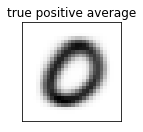

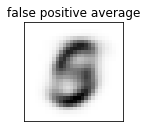

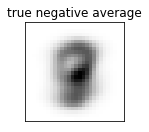

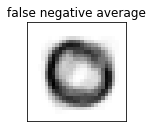

In [17]:
bpf(y,0.701)   